**LEGALIZING GAMING THROUGH BALLOT VOTING PROBLEM**

**INTRODUCTION**

Understanding and predicting voting behavior regarding the legalization of gaming through voting ballots is crucial for policymakers, advocacy groups, and businesses involved in the gaming industry. This analysis aims to explore the factors influencing voting outcomes by applying machine learning classifiers to a provided dataset. By identifying key predictors and patterns, we seek to empower stakeholders with insights to inform strategic decisions and initiatives related to gaming legislation.

The primary objective of this analysis is to develop and compare multiple prediction methods for determining whether a county will vote "yes" or "no" on the issue of legalizing gaming. By employing various classification algorithms(Decision Trees (DT), Naïve Bayes (NB), and KNN), we aim to uncover patterns and relationships within the dataset that can aid in predicting the outcome of such ballot initiatives.

**DATA UNDERSTANDING AND PREPROCESSING**

**1.Loading the Dataset**: We begin the analysis by loading the dataset into the Google Colab environment using the file upload feature.

**2.Exploratory Data Analysis (EDA)**: We conduct exploratory data analysis (EDA) to gain a better understanding of the dataset which includes examining the first few rows of the dataset, checking for missing values, and visualizing central tendency and dispersion measures.

**3.Data Visualization:** We utilize various data visualization techniques such as histograms, boxplots, and scatterplots to visualize the distribution of variables and explore relationships between them.

**VARIABLES DESCRIPTION**

State No: Identifier for the state.

County No: Identifier for the county within the state.

FOR: Number of votes in favor of legalizing gaming.

AGAINST: Number of votes against legalizing gaming.

TOTAL CASTE: Total number of votes cast.

DEPENDENT VARIABLE: The variable used for prediction (probably the same as "Ballot Type").

BALLOT TYPE: The outcome of the ballot initiative, indicating whether the county voted "for" or "against" legalizing gaming.

POPULATION: Total population of the county.

PCI (Per Capita Income): The average income per person in the county.

MEDIUM FAMILY INCOME: The median income of families in the county.

SIZE OF COUNTY: The geographical size of the county.

POPULATION DENSITY: The number of people per square mile in the county.

PERCENT WHITE: The percentage of the population that identifies as White.

PERCENT BLACK: The percentage of the population that identifies as Black.

PERCENT OTHER: The percentage of the population that identifies as a race other than White or Black.

PERCENT MALE: The percentage of the population that is male.

PERCENT FEMALE: The percentage of the population that is female.

POVERTY LEVEL: The percentage of the population living below the poverty line.

UNEMPLOYMENT RATE: The percentage of unemployed individuals in the county.

AGE LESS THAN 18: The percentage of the population aged less than 18 years.

AGE 24-44: The percentage of the population aged between 24 and 44 years.

AGE 45-64: The percentage of the population aged between 45 and 64 years.

AGE OLDER THAN 65: The percentage of the population aged older than 65 years.

MSA (Metropolitan Statistical Area): Indicates whether the county is part of a Metropolitan Statistical Area.

PERCENT MINORITY: The percentage of the population that identifies as a minority.

NO OF OLDER: Number of older individuals in the county.

NO OF YOUNGER: Number of younger individuals in the county.



**UPLOAD AND CLEAN DATA**

**Step 1:** Load the Voting dataset to Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 2**: Import the necessary python libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

**Step 3:** Read the data from the Gaming Ballot Data Set-1.xls file

In [ ]:
file_path = "/content/drive/My Drive/Gaming Ballot Data Set-1.xls"

vote = pd.read_excel(file_path)
vote

,State No,County No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,...,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
0,1,1,42385,22992,65377,1,1,265038,15607,34618,...,5.0,80600,22627,94724,46933,20154,1,0.25,67087,189448
1,1,2,2015,1852,3867,1,1,13617,13740,23114,...,7.0,4285,1861,4092,2114,1265,2,0.40,3379,8184
2,1,3,51959,48406,100365,1,1,391511,24187,44874,...,3.0,111243,29574,150740,70783,29171,1,0.15,99954,301480
3,1,4,957,856,1813,1,1,5345,12816,27359,...,5.0,1647,229,1670,1178,621,2,0.26,1799,3340
4,1,5,942,1129,2071,0,1,4556,19017,23054,...,1.0,1192,220,1231,973,940,2,0.07,1913,2462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,18,41,44069,27316,71385,1,1,354527,18893,27622,...,15.6,124607,30781,100927,62657,35555,1,0.50,98212,201854
1283,18,42,10026,9755,19781,1,1,53029,20082,33810,...,8.0,11972,3497,16099,12015,9446,2,0.13,21461,32198
1284,18,43,126397,76905,203302,1,1,732143,28711,49763,...,5.6,208062,65744,235177,146412,76748,1,0.38,223160,470354
1285,18,44,26412,23464,49876,1,1,153293,25791,38751,...,5.4,39727,23948,46570,27627,15421,1,0.35,43048,93140


**Step 4:** DIsplay all the attributes of the Voting dataset

In [ ]:
vote.keys()

Index(['State No', 'County No', 'FOR', 'AGAINST', 'TOTAL CASTE',
       'DEPENDENT VARIABLE', 'BALLOT TYPE', 'POPULATION', 'PCI',
       'MEDIUM FAMILY INCOME', 'SIZE OF COUNTY', 'POPULATION DENSITY',
       'PERCENT WHITE', 'PERCENT BLACK', 'PERCENT OTHER', 'PERCENT MALE',
       'PERCENT FEMALE', 'NO OF CHURCHES', 'NO OF CHURCH MEMBERS',
       'PERCENT CHURCH MEMBERS OF POPULATION', 'POVERTY LEVEL',
       'UNEMPLOYMENT RATE', 'AGE LESS THAN 18', 'AGE24', 'AGE44', 'AGE64',
       'AGE OLDER THAN 65', 'MSA', 'PERCENT MINORITY', 'NO OF OLDER',
       'NO OF YOUNGER'],
      dtype='object')

**Step 5:** Select only the required columns for effective decision making

In [ ]:
desired_columns = ['FOR', 'AGAINST', 'TOTAL CASTE', 'POPULATION', 'SIZE OF COUNTY','MEDIUM FAMILY INCOME',
'POPULATION DENSITY', 'UNEMPLOYMENT RATE', 'POVERTY LEVEL','AGE24','NO OF YOUNGER', 'MSA', 'DEPENDENT VARIABLE','BALLOT TYPE']
vote_desired = vote [desired_columns]

FOR and AGAINST: represent the opinions or preferences of individuals regarding gaming legalization.Higher values in either variable might indicate a stronger stance.

TOTAL CASTE:Higher total caste values could suggest greater diversity in opinions, potentially affecting the prediction of the dependent variable.

POPULATION and SIZE OF COUNTY:Higher population densities or larger county sizes might indicate more diverse perspectives and social dynamics, which could impact the prediction of the dependent variable.

MEDIUM FAMILY INCOME:represents the economic status or wealth level of families in the area.Higher income levels might correlate with specific attitudes or values, potentially affecting the prediction of the dependent variable.

POPULATION DENSITY and UNEMPLOYMENT RATE: influence the model's prediction by capturing factors related to community dynamics, economic stability, and social well-being, which could shape opinions on gaming legalization.

POVERTY LEVEL: influence the model's prediction by reflecting economic disparities or social challenges that impact perspectives on gaming legalization.

AGE24 and NO OF YOUNGER: Higher values might indicate a larger proportion of younger individuals, whose opinions could shape the prediction of the dependent variable.

MSA: Being part of an MSA might correlate with certain cultural or socioeconomic factors, influencing the prediction of the dependent variable.

DEPENDENT VARIABLE: Different dependent types might affect voter turnout or the clarity of choices, potentially influencing the prediction of the dependent variable.


**Step 6:** Replacing 1 with Yes and 0 with No in the target column Ballot Type

In [ ]:
vote = vote_desired.copy()
vote.loc[:, 'BALLOT TYPE'] = vote['BALLOT TYPE'].replace({2: 'No', 1: 'Yes'})

**Step 7:** Examine the first few rows of the dataset to have a better understanding

In [ ]:
vote.head()

,FOR,AGAINST,TOTAL CASTE,POPULATION,SIZE OF COUNTY,MEDIUM FAMILY INCOME,POPULATION DENSITY,UNEMPLOYMENT RATE,POVERTY LEVEL,AGE24,NO OF YOUNGER,MSA,DEPENDENT VARIABLE,BALLOT TYPE
0,42385,22992,65377,265038,1192.0,34618,223.29,5.0,10.4,22627,189448,1,1,Yes
1,2015,1852,3867,13617,722.8,23114,18.81,7.0,24.8,1861,8184,2,1,Yes
2,51959,48406,100365,391511,803.2,44874,490.34,3.0,5.9,29574,301480,1,1,Yes
3,957,856,1813,5345,1349.4,27359,3.99,5.0,16.9,229,3340,2,1,Yes
4,942,1129,2071,4556,2555.9,23054,1.77,1.0,19.0,220,2462,2,0,Yes


**Step 8:** Check for any missing values

In [ ]:
vote.isnull().sum()

FOR                     0
AGAINST                 0
TOTAL CASTE             0
POPULATION              0
SIZE OF COUNTY          0
MEDIUM FAMILY INCOME    0
POPULATION DENSITY      0
UNEMPLOYMENT RATE       0
POVERTY LEVEL           0
AGE24                   0
NO OF YOUNGER           0
MSA                     0
DEPENDENT VARIABLE      0
BALLOT TYPE             0
dtype: int64

**Step 9:** Examine the data types of the variables involved

In [ ]:
vote.dtypes

FOR                       int64
AGAINST                   int64
TOTAL CASTE               int64
POPULATION                int64
SIZE OF COUNTY          float64
MEDIUM FAMILY INCOME      int64
POPULATION DENSITY      float64
UNEMPLOYMENT RATE       float64
POVERTY LEVEL           float64
AGE24                     int64
NO OF YOUNGER             int64
MSA                       int64
DEPENDENT VARIABLE        int64
BALLOT TYPE              object
dtype: object

**Step 10:** Change the categorical variables as type category

In [ ]:
vote['BALLOT TYPE'] = vote['BALLOT TYPE'].astype('category')
vote['DEPENDENT VARIABLE'] = vote['DEPENDENT VARIABLE'].astype('category')
vote['MSA'] = vote['MSA'].astype('category')

**Step 11:**Examine the data types of variables after changing the categorical variables as type category.

In [ ]:
vote.dtypes

FOR                        int64
AGAINST                    int64
TOTAL CASTE                int64
POPULATION                 int64
SIZE OF COUNTY           float64
MEDIUM FAMILY INCOME       int64
POPULATION DENSITY       float64
UNEMPLOYMENT RATE        float64
POVERTY LEVEL            float64
AGE24                      int64
NO OF YOUNGER              int64
MSA                     category
DEPENDENT VARIABLE      category
BALLOT TYPE             category
dtype: object

**Step 12:** Display all numeric variables

In [ ]:
vote.select_dtypes(include=['number'])

,FOR,AGAINST,TOTAL CASTE,POPULATION,SIZE OF COUNTY,MEDIUM FAMILY INCOME,POPULATION DENSITY,UNEMPLOYMENT RATE,POVERTY LEVEL,AGE24,NO OF YOUNGER
0,42385,22992,65377,265038,1192.0,34618,223.29,5.0,10.4,22627,189448
1,2015,1852,3867,13617,722.8,23114,18.81,7.0,24.8,1861,8184
2,51959,48406,100365,391511,803.2,44874,490.34,3.0,5.9,29574,301480
3,957,856,1813,5345,1349.4,27359,3.99,5.0,16.9,229,3340
4,942,1129,2071,4556,2555.9,23054,1.77,1.0,19.0,220,2462
...,...,...,...,...,...,...,...,...,...,...,...
1282,44069,27316,71385,354527,4839.4,27622,74.68,15.6,27.9,30781,201854
1283,10026,9755,19781,53029,2274.5,33810,23.17,8.0,14.8,3497,32198
1284,126397,76905,203302,732143,2208.4,49763,334.27,5.6,10.3,65744,470354
1285,26412,23464,49876,153293,1022.9,38751,152.51,5.4,15.8,23948,93140


**Step 13:** Show the statistics of numeric variables

In [ ]:
vote.describe()

,FOR,AGAINST,TOTAL CASTE,POPULATION,SIZE OF COUNTY,MEDIUM FAMILY INCOME,POPULATION DENSITY,UNEMPLOYMENT RATE,POVERTY LEVEL,AGE24,NO OF YOUNGER
count,1287.000000,1287.000000,1287.000000,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000
mean,6460.944056,7330.511267,13791.455322,5.247528e+04,1000.487801,27398.725719,81.573478,6.050505,17.409169,5204.804973,32994.245532
std,14766.945874,15099.602719,28431.805279,1.097376e+05,778.794180,6403.965308,221.758531,3.410285,7.214297,11700.168130,74520.007437
min,44.000000,15.000000,59.000000,3.270000e+02,120.800000,12225.000000,0.295834,0.600000,3.200000,16.000000,216.000000
25%,812.000000,908.500000,1818.000000,6.541500e+03,534.250000,22907.000000,7.024294,3.600000,12.100000,417.500000,3434.000000
50%,1847.000000,2017.000000,3989.000000,1.612600e+04,832.500000,26508.000000,22.596521,5.400000,16.200000,1302.000000,9040.000000
75%,4669.500000,6013.500000,10767.500000,4.313700e+04,1140.450000,31060.500000,64.863002,7.600000,21.450000,4119.000000,25155.000000
max,161415.000000,121925.000000,245523.000000,1.206243e+06,6347.800000,55643.000000,3404.480000,38.500000,49.900000,137916.000000,875074.000000


**Step 14:** IQR of Population variable

In [ ]:
IQR = vote['POPULATION'].quantile(0.75) - vote['POPULATION'].quantile(0.25)
print("IQR:", IQR)

IQR: 36595.5


**Step 15:** Histogram of all numeric variables

(0.0, 10000.0)

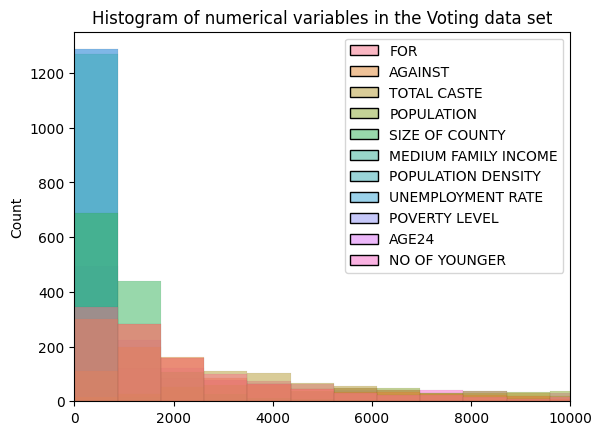

In [ ]:
snsplot = sns.histplot(data = vote)
snsplot.set_title("Histogram of numerical variables in the Voting data set")
snsplot.set_xlim([0, 10000])

The above histogram gives us the overview of how each numerical variable is contributing to the voting. Population Density has the count 1250 which is higher compared to other variables.Also we can see that Against variable has more count which means many people have voted against legalizing gaming.

**Step 16:** Histogram of a numeric variable: Population Density

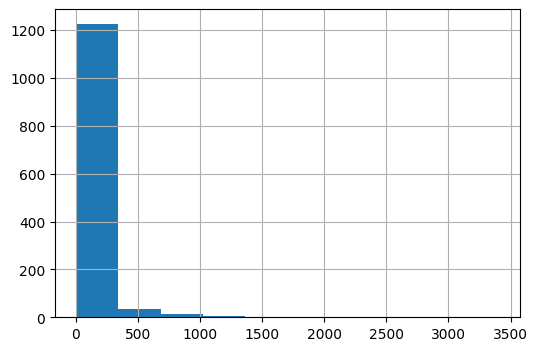

In [ ]:
vote['POPULATION DENSITY'].hist(figsize=(6,4))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

The histogram of population density shows strong support for legalizing gaming, indicated by a count of 1250, reflecting widespread acceptance and potential economic benefits across varied population densities

**Step 17:** Boxplot of numerical variables

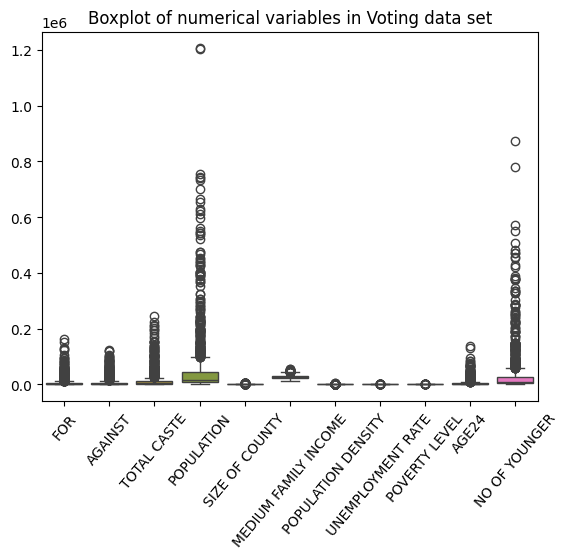

<Figure size 1000x600 with 0 Axes>

In [ ]:
snsplot = sns.boxplot(data = vote)
snsplot.set_title("Boxplot of numerical variables in Voting data set")
plt.xticks(rotation=50)
plt.figure(figsize=(10, 6))
plt.show()




The boxplot shows that both younger and total caste members are involved, but some individuals stand out as outliers, they are significantly different from the rest.

**Step 18:** Boxplot of numerical variable Population

(0.0, 500000.0)

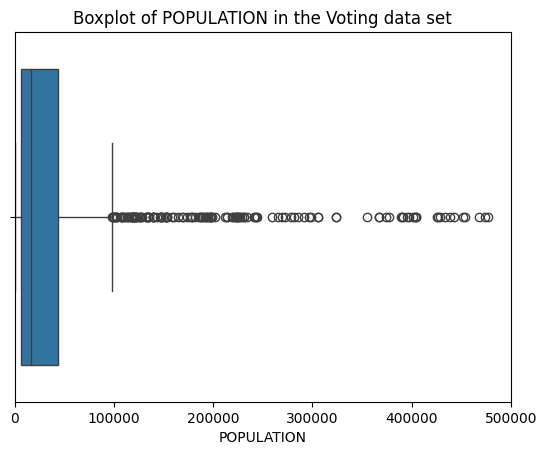

In [ ]:
snsplot = sns.boxplot(x='POPULATION', data = vote)
snsplot.set_title("Boxplot of POPULATION in the Voting data set")
snsplot.set_xlim([0, 500000])

Boxplot of Population variable shows minimum count 10000 and maximum count 40000. It displays range of outliers after the count 100000.

**Step 19:** Display all categorical variables

In [ ]:
vote.select_dtypes(include=['category'])

,MSA,DEPENDENT VARIABLE,BALLOT TYPE
0,1,1,Yes
1,2,1,Yes
2,1,1,Yes
3,2,1,Yes
4,2,0,Yes
...,...,...,...
1282,1,1,Yes
1283,2,1,Yes
1284,1,1,Yes
1285,1,1,Yes


**Step 20:** Show the statistics of a categorical variable: MSA

In [ ]:
vote['MSA'].describe()

count     1287
unique       2
top          2
freq      1006
Name: MSA, dtype: int64

**Step 21:** Show the statistics of a categorical variable: Dependent Variable

In [ ]:
vote['DEPENDENT VARIABLE'].describe()

count     1287
unique       2
top          0
freq       739
Name: DEPENDENT VARIABLE, dtype: int64

**Step 22:** Show the proportion of a categorical variable: MSA

In [ ]:
vote['MSA'].value_counts(normalize=True)

2    0.781663
1    0.218337
Name: MSA, dtype: float64

**Step 23:** Show the proportion of a categorical variable: Dependent Variable

In [ ]:
vote['DEPENDENT VARIABLE'].value_counts(normalize=True)

0    0.574204
1    0.425796
Name: DEPENDENT VARIABLE, dtype: float64

**Step 24:** Countplot of categorical variable MSA

<ipython-input-406-ec0e60bf3dda>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  snsplot.set_xticklabels(snsplot.get_xticklabels(), rotation=0)


Text(0.5, 1.0, 'countplot of MSA in the Voting data set')

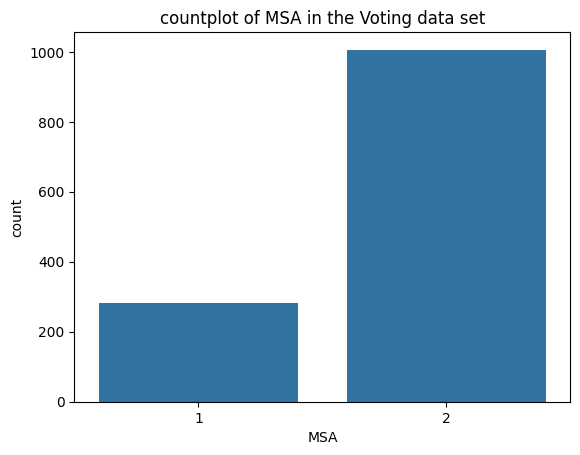

In [ ]:
snsplot = sns.countplot(x='MSA', data=vote)
snsplot.set_xticklabels(snsplot.get_xticklabels(), rotation=0)
snsplot.set_title("countplot of MSA in the Voting data set")

The Countplot of MSA (Metropolitan Statistical Area) reveals 300 MSAs in favor of legalizing gaming, contrasting with 1000 MSAs against, reflecting diverse opinions across urban areas regarding gaming legalization.

**Step 25:** Countplot of categorical variable Dependent Variable

<ipython-input-407-c2d448f1f1b9>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  snsplot.set_xticklabels(snsplot.get_xticklabels(), rotation=0)


Text(0.5, 1.0, 'countplot of DEPENDENT VARIABLE in the Voting data set')

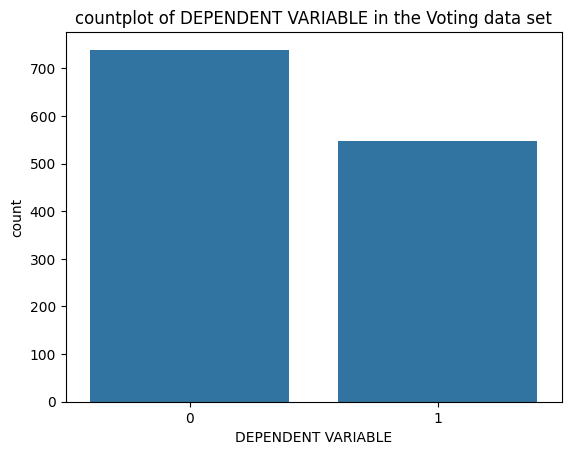

In [ ]:
snsplot = sns.countplot(x='DEPENDENT VARIABLE', data=vote)
snsplot.set_xticklabels(snsplot.get_xticklabels(), rotation=0)
snsplot.set_title("countplot of DEPENDENT VARIABLE in the Voting data set")

The Countplot of the dependent variable displays 750 instances in support of legalizing gaming and 550 instances against, portraying a nuanced distribution of opinions within the dataset regarding gaming legalization.

**Step 26:** Scatterplot of two numerical variables Population and For

Text(0.5, 1.0, 'Scatterplot of POPULATION and FOR')

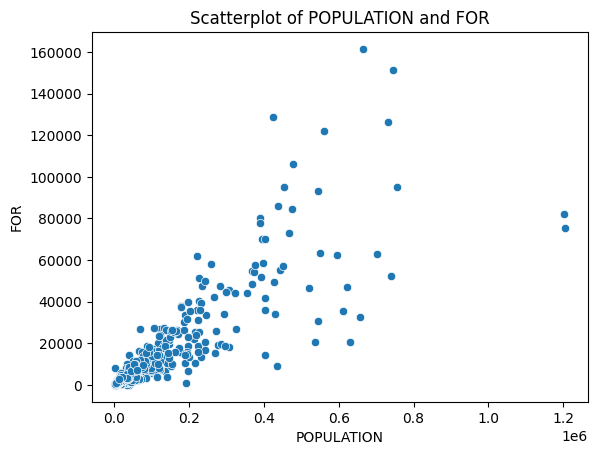

In [ ]:
snsplot = sns.scatterplot(x='POPULATION', y= 'FOR', data=vote)
snsplot.set_title("Scatterplot of POPULATION and FOR")

The Scatterplot of Population versus support for legalizing gaming spans across the range of 0 to 0.2 on the x-axis and 40000 on the y-axis, and a few for votes in 160000 range suggesting a varied relationship between population size and support for gaming legalization within this specific range.

**Step 27:** Generate the correlation matrix of all numeric variables

In [ ]:
vote.corr()

<ipython-input-409-ebd5e364ddfe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  vote.corr()


,FOR,AGAINST,TOTAL CASTE,POPULATION,SIZE OF COUNTY,MEDIUM FAMILY INCOME,POPULATION DENSITY,UNEMPLOYMENT RATE,POVERTY LEVEL,AGE24,NO OF YOUNGER
FOR,1.000000,0.812438,0.950852,0.864461,0.044976,0.413906,0.777529,0.032654,-0.147201,0.796980,0.834119
AGAINST,0.812438,1.000000,0.953047,0.829137,0.043120,0.451879,0.629724,0.011948,-0.230524,0.717487,0.762960
TOTAL CASTE,0.950852,0.953047,1.000000,0.889324,0.046260,0.454960,0.738268,0.023305,-0.198880,0.794980,0.838420
POPULATION,0.864461,0.829137,0.889324,1.000000,0.069136,0.395292,0.729060,0.069237,-0.109792,0.934764,0.946171
SIZE OF COUNTY,0.044976,0.043120,0.046260,0.069136,1.000000,-0.003760,-0.167920,0.090892,0.079614,0.054009,0.054958
MEDIUM FAMILY INCOME,0.413906,0.451879,0.454960,0.395292,-0.003760,1.000000,0.322424,-0.238295,-0.725819,0.332224,0.384045
POPULATION DENSITY,0.777529,0.629724,0.738268,0.729060,-0.167920,0.322424,1.000000,0.006384,-0.101208,0.681265,0.712545
UNEMPLOYMENT RATE,0.032654,0.011948,0.023305,0.069237,0.090892,-0.238295,0.006384,1.000000,0.551619,0.063859,0.061898
POVERTY LEVEL,-0.147201,-0.230524,-0.198880,-0.109792,0.079614,-0.725819,-0.101208,0.551619,1.000000,-0.071449,-0.111924
AGE24,0.796980,0.717487,0.794980,0.934764,0.054009,0.332224,0.681265,0.063859,-0.071449,1.000000,0.972231


**Step 28:** Examine relationships between numeric and categorical variables: Population and MSA

(0.0, 500000.0)

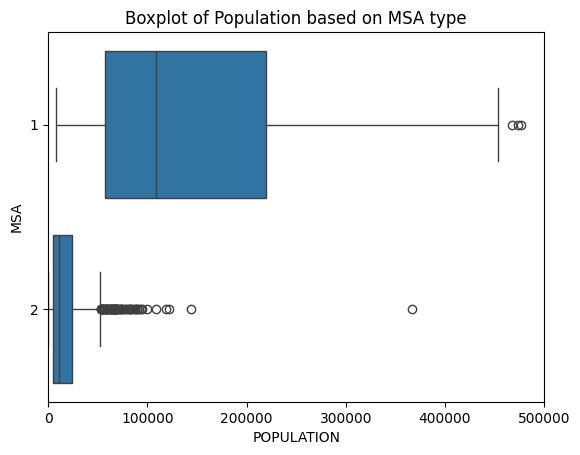

In [ ]:
snsplot = sns.boxplot(x='POPULATION', y= 'MSA', data = vote)
snsplot.set_title("Boxplot of Population based on MSA type")
snsplot.set_xlim([0, 500000])

The boxplot comparing Population across MSAs in favor and against gaming legalization shows a maximum population of 220,000 in areas supporting legalization, contrasting with 20,000 in areas opposing it, suggesting varied population sizes among regions with differing stances on gaming legalization.

**PARTITION THE DATASET FOR CLASSIFICATION MODELS**

**Step 29:** Create the dummy variables

In [ ]:
vote = pd.get_dummies(vote, columns=['MSA','DEPENDENT VARIABLE'], drop_first=True)
vote

,FOR,AGAINST,TOTAL CASTE,POPULATION,SIZE OF COUNTY,MEDIUM FAMILY INCOME,POPULATION DENSITY,UNEMPLOYMENT RATE,POVERTY LEVEL,AGE24,NO OF YOUNGER,BALLOT TYPE,MSA_2,DEPENDENT VARIABLE_1
0,42385,22992,65377,265038,1192.0,34618,223.29,5.0,10.4,22627,189448,Yes,0,1
1,2015,1852,3867,13617,722.8,23114,18.81,7.0,24.8,1861,8184,Yes,1,1
2,51959,48406,100365,391511,803.2,44874,490.34,3.0,5.9,29574,301480,Yes,0,1
3,957,856,1813,5345,1349.4,27359,3.99,5.0,16.9,229,3340,Yes,1,1
4,942,1129,2071,4556,2555.9,23054,1.77,1.0,19.0,220,2462,Yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,44069,27316,71385,354527,4839.4,27622,74.68,15.6,27.9,30781,201854,Yes,0,1
1283,10026,9755,19781,53029,2274.5,33810,23.17,8.0,14.8,3497,32198,Yes,1,1
1284,126397,76905,203302,732143,2208.4,49763,334.27,5.6,10.3,65744,470354,Yes,0,1
1285,26412,23464,49876,153293,1022.9,38751,152.51,5.4,15.8,23948,93140,Yes,0,1


**Step 31:** Check the proportion of the target variable (Ballot Type) by examining the count of Ballot tyoe yes and Ballot type no to ensure that dataset is representative.

In [ ]:
y = vote['BALLOT TYPE']
print(y.value_counts(normalize=True))

No     0.542347
Yes    0.457653
Name: BALLOT TYPE, dtype: float64


**Step 32:** Partition the data

In [ ]:
X = vote.drop(['BALLOT TYPE'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(900, 13) (387, 13) (900,) (387,)


**Step 33:** Apply minmax normalization on predictors for KNN model

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(X))
predictors_normalized.columns = X.columns
predictors_normalized

,FOR,AGAINST,TOTAL CASTE,POPULATION,SIZE OF COUNTY,MEDIUM FAMILY INCOME,POPULATION DENSITY,UNEMPLOYMENT RATE,POVERTY LEVEL,AGE24,NO OF YOUNGER,MSA_2,DEPENDENT VARIABLE_1
0,0.262383,0.188475,0.266100,0.219510,0.172025,0.515754,0.065506,0.116095,0.154176,0.163967,0.216300,0.0,1.0
1,0.012214,0.015068,0.015513,0.011021,0.096676,0.250795,0.005439,0.168865,0.462527,0.013379,0.009108,1.0,1.0
2,0.321712,0.396940,0.408638,0.324387,0.109587,0.751969,0.143953,0.063325,0.057816,0.214344,0.344358,0.0,1.0
3,0.005658,0.006899,0.007146,0.004161,0.197302,0.348565,0.001085,0.116095,0.293362,0.001545,0.003571,1.0,1.0
4,0.005565,0.009138,0.008197,0.003507,0.391055,0.249413,0.000433,0.010554,0.338330,0.001479,0.002567,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,0.272819,0.223944,0.290576,0.293719,0.757765,0.354623,0.021851,0.395778,0.528908,0.223096,0.230481,0.0,1.0
1283,0.061857,0.079895,0.080346,0.043703,0.345865,0.497144,0.006719,0.195251,0.248394,0.025243,0.036557,1.0,1.0
1284,0.782997,0.630711,0.827995,0.606855,0.335250,0.864572,0.098107,0.131926,0.152034,0.476635,0.537388,0.0,1.0
1285,0.163400,0.192347,0.202950,0.126846,0.144869,0.610945,0.044714,0.126649,0.269807,0.173546,0.106216,0.0,1.0


**MODEL DEVELOPMENT**

**1.Train-Test Split:** We split the dataset into training and testing sets using the train_test_split function from scikit-learn.

**2.Define Classifiers:** We develop a decision tree, Naive Bayes,KNN classifiers using scikit-learn's libraries.

**3.Model Training:** We train the classifiers on the training data to learn patterns and relationships between the features and the target variable (Ballot type).

 **Taking steps to balance the train data**

 **Step 34:**Combine X_train and y_train into a single DataFrame

In [ ]:
combined_train_df = pd.concat([X_train, y_train], axis=1)

**Step 35:** Separate majority and minority classes

In [ ]:
majority_df = combined_train_df[combined_train_df['BALLOT TYPE'] == 'No']
minority_df = combined_train_df[combined_train_df['BALLOT TYPE'] == 'Yes']

**Step 36:** Undersample the majority class randomly

In [ ]:
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

**Step 37:** Combine the undersampled majority class and the minority class

In [ ]:
undersampled_data = pd.concat([undersampled_majority, minority_df])

**Step 38:** Shuffle the combined DataFrame to ensure randomness

In [ ]:
balanced_data = undersampled_data.sample(frac=1, random_state=5)

**Step 39:** Split the balanced_data into predictors_train and target_train

In [ ]:
predictors_train = balanced_data.drop(columns=['BALLOT TYPE'])
target_train = balanced_data['BALLOT TYPE']

**Step 40:** Examine the porportion of target variable for train set

In [ ]:
print(y_train.value_counts(normalize=True), y_train.shape)

No     0.523333
Yes    0.476667
Name: BALLOT TYPE, dtype: float64 (900,)


**Step 41:** Examine the porportion of target variable for testing data set

In [ ]:
print(y_test.value_counts(normalize=True))

No     0.586563
Yes    0.413437
Name: BALLOT TYPE, dtype: float64


**Step 42:** Build a for Decision Tree model on training data with max_depth = 3, Naive Bayes and KNN.
Defining the clasiifiers and fitting them with train data

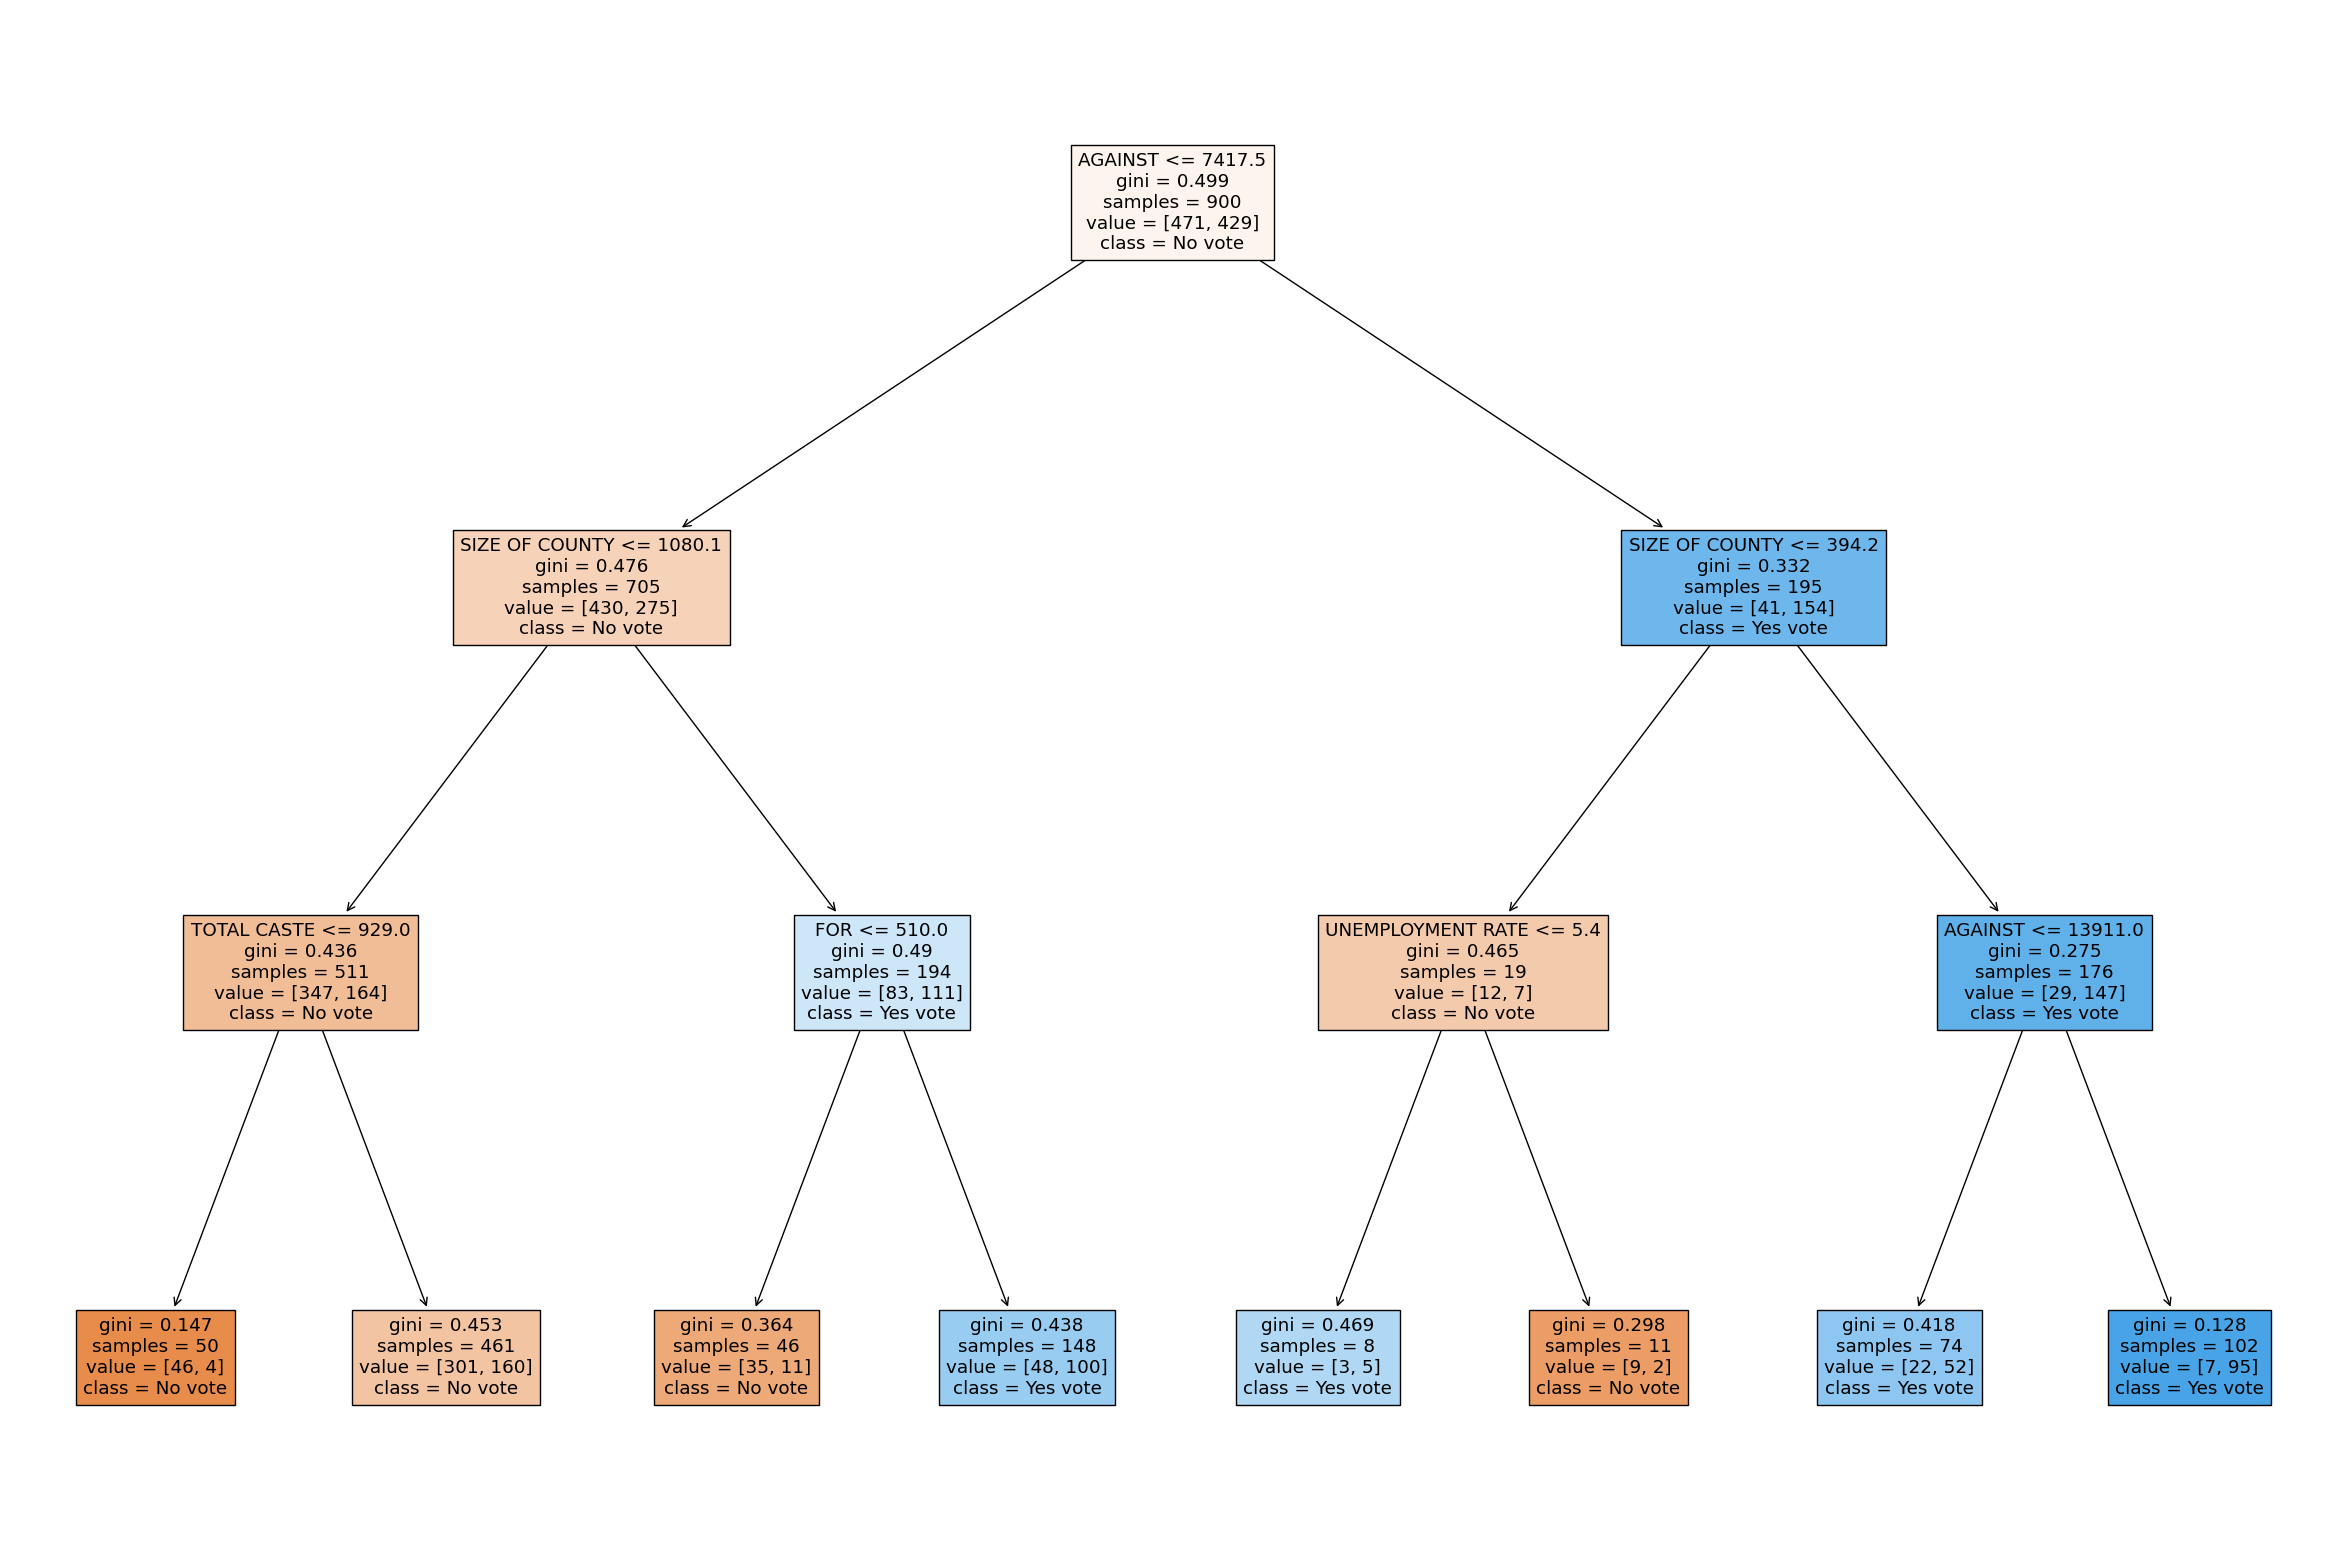

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth = 3, random_state=0)
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier()

dt_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)

fig = plt.figure(figsize=(30,20))

tree.plot_tree(dt_classifier,
          feature_names=list(X_train.columns),
          class_names=['No vote', 'Yes vote'],
          filled=True)
plt.show()

**Step 43:** Make predictions on testing data and calculate the accuracy of each model as below

In [ ]:
dt_preds = dt_classifier.predict(X_test)
nb_preds = nb_classifier.predict(X_test)
knn_preds = knn_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_preds)
nb_accuracy = accuracy_score(y_test, nb_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)

print("Decision Tree Classifier Accuracy: {:.2f}".format(dt_accuracy))
print("Naive Bayes Classifier Accuracy: {:.2f}".format(nb_accuracy))
print("KNN Classifier Accuracy: {:.2f}".format(knn_accuracy))

Decision Tree Classifier Accuracy: 0.70
Naive Bayes Classifier Accuracy: 0.64
KNN Classifier Accuracy: 0.65


Decision Tree Classifier: Achieving an accuracy of 70%, the decision tree model demonstrates relatively good performance in classifying the data into the respective categories.

Naive Bayes Classifier: With an accuracy of 64%, the Naive Bayes model performs slightly less effectively compared to the decision tree, but still provides reasonable classification results.

KNN Classifier: Scoring an accuracy of 65%, the KNN model falls between the decision tree and Naive Bayes in terms of performance, indicating moderate effectiveness in classifying the dataset.

**Step 44:** Perform 5 fold cross validation using Random Forest cliassifier

In [ ]:
X_cv = vote.drop(columns=['BALLOT TYPE'])
y_cv = vote['BALLOT TYPE']

rf_classifier = RandomForestClassifier()

cv_scores = cross_val_score(rf_classifier, X_cv, y_cv, cv=5)

print("Cross-validation scores:", cv_scores)

print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.52713178 0.7248062  0.52140078 0.48249027 0.48638132]
Mean cross-validation score: 0.548442071607396


Cross-validation is a technique used to assess the performance of a machine learning model by splitting the dataset into multiple subsets (folds), training the model on a portion of the data, and evaluating it on the remaining unseen data. The cross-validation scores indicate the performance of the model across different folds:

The scores range from approximately 0.48 to 0.72, demonstrating variability in the model's performance across different subsets of the data.
The mean cross-validation score, calculated as the average of all individual scores, is approximately 0.55.This mean score serves as a more robust indicator of the model's generalization performance compared to a single accuracy score. It suggests that, on average, the model performs moderately well across different subsets of the data, indicating reasonable but not exceptional performance.

**MODEL EVALUATION AND RESULTS**

**1.Model Prediction:** We use the trained classifiers to make predictions on the test data.

**2.Model Evaluation Metrics:** We evaluate the performance of the classifier using various metrics including accuracy, precision, recall, F1 score, and confusion matrix.

**3.Feature Importance:** We analyze the feature importances to identify the variables that have the highest impact on predicting .

**Step 45:**

*   Define function to calculate confusion matrix and classification report.
*   Train the classifier
*   Make Predictions on train and test sets
*   Compute and confusion matrix, classification report for train and test sets










Decision Tree Classifier:
Train Confusion Matrix:
 [[391  80]
 [177 252]]
Train Classification Report:
               precision    recall  f1-score   support

          No       0.69      0.83      0.75       471
         Yes       0.76      0.59      0.66       429

    accuracy                           0.71       900
   macro avg       0.72      0.71      0.71       900
weighted avg       0.72      0.71      0.71       900

Test Confusion Matrix:
 [[183  44]
 [ 72  88]]
Test Classification Report:
               precision    recall  f1-score   support

          No       0.72      0.81      0.76       227
         Yes       0.67      0.55      0.60       160

    accuracy                           0.70       387
   macro avg       0.69      0.68      0.68       387
weighted avg       0.70      0.70      0.69       387



Naive Bayes Classifier:
Train Confusion Matrix:
 [[436  35]
 [312 117]]
Train Classification Report:
               precision    recall  f1-score   support

       

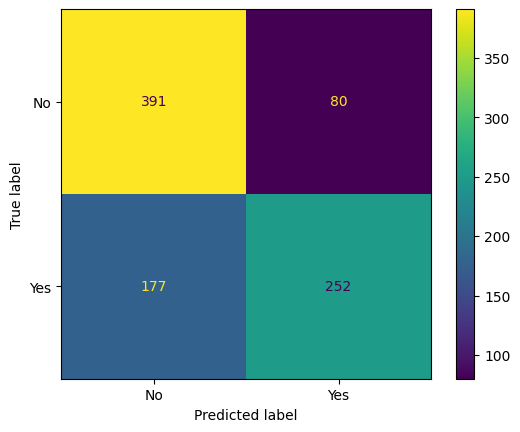

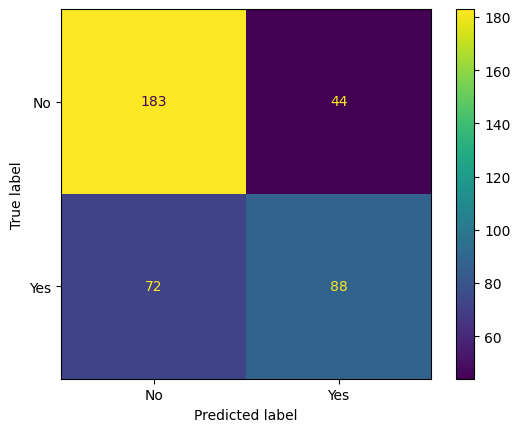

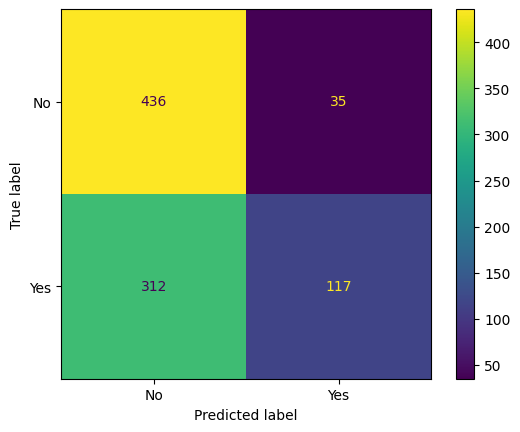

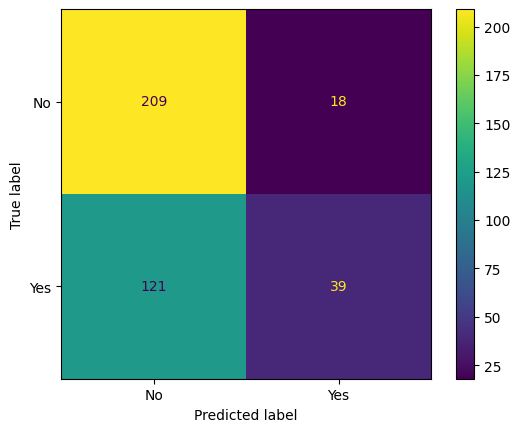

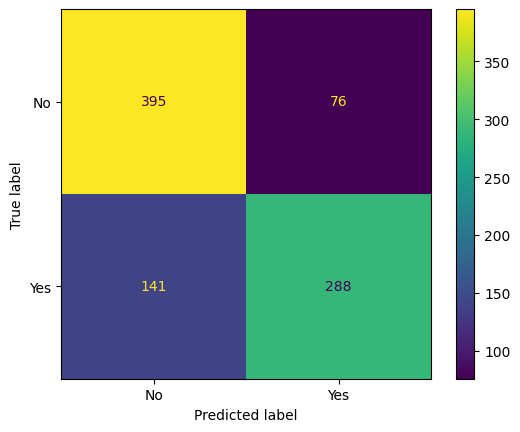

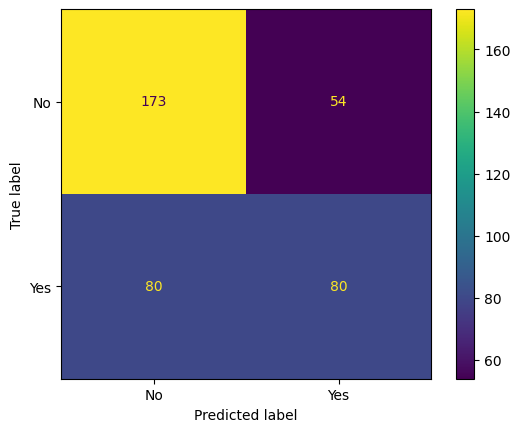

In [ ]:

def evaluate_model(classifier, X_train, X_test, y_train, y_test):

    classifier.fit(X_train, y_train)

    train_preds = classifier.predict(X_train)
    test_preds = classifier.predict(X_test)

    train_conf_matrix = confusion_matrix(y_train, train_preds)
    ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix, display_labels=classifier.classes_).plot()
    train_classification_report = classification_report(y_train, train_preds)

    test_conf_matrix = confusion_matrix(y_test, test_preds)
    ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=classifier.classes_).plot()
    test_classification_report = classification_report(y_test, test_preds)

    return train_conf_matrix, train_classification_report, test_conf_matrix, test_classification_report

# Evaluate Decision Tree Classifier
dt_train_conf_matrix, dt_train_classification_report, dt_test_conf_matrix, dt_test_classification_report = evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)

# Evaluate Naive Bayes Classifier
nb_train_conf_matrix, nb_train_classification_report, nb_test_conf_matrix, nb_test_classification_report = evaluate_model(nb_classifier, X_train, X_test, y_train, y_test)

# Evaluate KNN Classifier
knn_train_conf_matrix, knn_train_classification_report, knn_test_conf_matrix, knn_test_classification_report = evaluate_model(knn_classifier, X_train, X_test, y_train, y_test)

# Print confusion matrices and classification reports
print("Decision Tree Classifier:")
print("Train Confusion Matrix:\n", dt_train_conf_matrix)
print("Train Classification Report:\n", dt_train_classification_report)
print("Test Confusion Matrix:\n", dt_test_conf_matrix)
print("Test Classification Report:\n", dt_test_classification_report)
print("\n")

print("Naive Bayes Classifier:")
print("Train Confusion Matrix:\n", nb_train_conf_matrix)
print("Train Classification Report:\n", nb_train_classification_report)
print("Test Confusion Matrix:\n", nb_test_conf_matrix)
print("Test Classification Report:\n", nb_test_classification_report)
print("\n")

print("KNN Classifier:")
print("Train Confusion Matrix:\n", knn_train_conf_matrix)
print("Train Classification Report:\n", knn_train_classification_report)
print("Test Confusion Matrix:\n", knn_test_conf_matrix)
print("Test Classification Report:\n", knn_test_classification_report)


**Step 46:** Employing feature importance to find the variables with highest impact on prediction using random forest.

In [ ]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Filter the DataFrame to include only the desired columns
desired_columns = ['FOR', 'AGAINST', 'TOTAL CASTE', 'POPULATION', 'SIZE OF COUNTY', 'MEDIUM FAMILY INCOME',
                   'POPULATION DENSITY', 'UNEMPLOYMENT RATE', 'POVERTY LEVEL', 'MSA']

filtered_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(desired_columns)]

# Sort the DataFrame by importance scores in descending order
sorted_features = filtered_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_5_features = sorted_features.head(5)

# Print or visualize the top 5 features
print(top_5_features)

              Feature  Importance
1             AGAINST    0.135065
0                 FOR    0.113018
2         TOTAL CASTE    0.104744
4      SIZE OF COUNTY    0.099484
6  POPULATION DENSITY    0.084984


**AGAINST (Gaming Opposition):** This feature has the highest importance with a score of 0.132568, indicating that the stance against gaming legalization significantly impacts the prediction outcome. Areas with higher opposition are likely to affect the prediction more substantially.

**FOR (Gaming Advocacy):** With an importance score of 0.112055, this feature represents the level of support for gaming legalization. Its influence is slightly lower than the opposition stance but still significant in predicting the outcome.

**TOTAL CASTE**: This variable ranks third in importance with a score of 0.102121. It suggests that the total number of castes within a region plays a notable role in predicting the stance on gaming legalization.

**SIZE OF COUNTY:** This feature holds a relatively high importance score of 0.099906, indicating that the size of the county has a significant impact on the prediction. Larger counties might exhibit different attitudes toward gaming legalization compared to smaller ones.

**MEDIUM FAMILY INCOME:** With an importance score of 0.089089, the medium family income is also influential in predicting the stance on gaming legalization. It suggests that regions with varying income levels may have different perspectives on this issue.

**BALANCING THE DATA**

The data imbalance is evident from the provided distribution of the target variable. The "No" class constitutes approximately 58.7% of the data, while the "Yes" class comprises about 41.3%. This suggests that the dataset is moderately imbalanced, with the "No" class being the majority.

If the data is imbalanced,the several approaches we could take are:

**Resampling Techniques:** Employ techniques such as oversampling the minority class (e.g., "Yes") or undersampling the majority class (e.g., "No") to balance the dataset.

**Generate Synthetic Samples:** Use methods like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic samples for the minority class, improving its representation.

**Algorithmic Approaches:** Utilize algorithms that handle class imbalances effectively, such as ensemble methods like Random Forest or Gradient Boosting, or algorithms with class weights adjustments.

**Performance Metrics:** Focus on evaluation metrics that account for class imbalances, such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC), rather than relying solely on accuracy.

**Cross-Validation Strategies:** Implement cross-validation techniques that maintain class balance in each fold to provide a more accurate estimate of model performance and avoid overfitting to the majority class.

**PERFORMANCE EVALUATION OF EACH MODEL**

**Decision Tree Classifier**:

F1-score for "No": 0.75

F1-score for "Yes": 0.66

The decision tree classifier achieves an F1-score of 0.75 for predicting instances where gaming legalization is not supported ("No") and 0.66 for predicting instances where it is supported ("Yes").

**Naive Bayes Classifier:**

F1-score for "No": 0.72

F1-score for "Yes": 0.40

The Naive Bayes classifier attains an F1-score of 0.72 for predicting instances against gaming legalization ("No") and 0.40 for predicting instances in favor ("Yes").

**KNN Classifier:**

F1-score for "No": 0.72

F1-score for "Yes": 0.54

The KNN classifier achieves an F1-score of 0.72 for predicting instances where gaming legalization is not supported ("No") and 0.54 for predicting instances where it is supported ("Yes").

Based on the F1-scores, the decision tree classifier performs best for both "No" and "Yes" classes, indicating it strikes a better balance between precision and recall.

**True Positives (TP):** Naive Bayes Classifier has the highest TP for instances not supporting gaming legalization (No) with 436, followed by the KNN Classifier with 395, and the Decision Tree Classifier with 391.

**True Negatives (TN):** KNN Classifier has the highest TN for instances supporting gaming legalization (Yes) with 288, followed by the Decision Tree Classifier with 252, and Naive Bayes Classifier with 117.

**False Positives (FP)**: Decision Tree Classifier has the highest FP for instances supporting gaming legalization (Yes) with 80, followed by KNN Classifier with 76, and Naive Bayes Classifier with 35.

**False Negatives (FN):** Naive Bayes Classifier has the highest FN for instances supporting gaming legalization (No) with 312, followed by the KNN Classifier with 141, and the Decision Tree Classifier with 177.

The Naive Bayes Classifier performs better in identifying instances not supporting legalization, but struggles with identifying instances supporting it. The Decision Tree Classifier shows balanced performance but with a higher false positive rate. The KNN Classifier has higher true positives and true negatives but also higher false positives and false negatives compared to the other models.

**OVERALL PERFORMANCE**

**Decision Tree Classifier**: Accuracy = 0.70

**Naive Bayes Classifier:** Accuracy = 0.64

**KNN Classifier:** Accuracy = 0.65

Based on accuracy values, the decision tree classifier performs the best among the three models with an accuracy of **70%**, followed by the KNN classifier with **65%**, and then the Naive Bayes classifier with **64%**. Therefore, the decision tree classifier is the most accurate model for this classification task.

**PERFORMANCE EVALUATION ON TRAIN AND TEST DATA**

The performance of the models on the train set and test set can provide insights into their generalization capability and potential for overfitting.

**Decision Tree Classifier:**

Train Set Performance: The model achieves an accuracy of **71%** on the train set. It exhibits higher precision and recall for the "No" class compared to the "Yes" class, indicating better performance in identifying instances where gaming legalization is not supported.

Test Set Performance: On the test set, the accuracy slightly decreases to **70%**. The model maintains higher precision and recall for the "No" class, indicating consistent performance but slightly lower than the train set.

**Naive Bayes Classifier:**

Train Set Performance: The model achieves an accuracy of **61%** on the train set. It demonstrates higher precision and recall for the "No" class, suggesting better performance in identifying instances against gaming legalization.

Test Set Performance: On the test set, the accuracy increases slightly to **64%.** The model continues to exhibit higher precision and recall for the "No" class, indicating consistent performance but still skewed towards identifying instances against gaming legalization.

**KNN Classifier:**

Train Set Performance: The model performs well on the train set with an accuracy of **76%**. It demonstrates balanced precision and recall for both classes, indicating effective performance in identifying instances for and against gaming legalization.

Test Set Performance: On the test set, the accuracy decreases to **65%**. The model maintains balanced precision and recall for both classes but slightly lower than the train set, suggesting some level of overfitting.


**STRENGTHS:**

**Comprehensive Analysis:** We utilized a range of machine learning models including Decision Tree, Naive Bayes, and KNN, allowing us to capture different aspects of the data.

**Interpretability**: Decision Tree classifiers provided clear decision rules, aiding in understanding the factors driving the predictions.

**Performance Evaluation**: We assessed model performance using multiple metrics including accuracy, sensitivity, F1-score, and confusion matrices, providing a comprehensive view of each model's strengths and weaknesses.

**Data Understanding:** We thoroughly examined the data distribution, imbalance, and relationships between variables, ensuring a deep understanding of the dataset.

**WEAKNESSES:**

**Imbalanced Data:** The dataset exhibited some imbalance, particularly in the target variable, which could have affected the performance of some models.

**Model Complexity**: While Decision Trees are interpretable, they may not capture complex relationships present in the data. More sophisticated models could potentially provide better predictive performance.

**Limited Feature Engineering**: We primarily relied on the provided features without extensive feature engineering. Further feature selection or creation could enhance model performance.

**Overfitting:** Some models, particularly KNN, showed signs of overfitting as evidenced by the difference in performance between train and test sets.

**CONCLUSION**

In analyzing the dataset on voting behaviors regarding gaming legalization, we have employed various tools and techniques to understand the factors influencing people's stances. Our exploration revealed several insights into demographic, socio-economic, and geographical factors shaping these opinions.

Overall, The analysis showed good Model Selection,Performance Metrics, Detailed Evaluation and Quantitative Analysis. However there was imbalanced Data, overfitting in KNN, limited Feature Engineering and model Interpretability.

Future iterations could focus on addressing these weaknesses through better driven feature engineering, model selection, and hyperparameter tuning. Additionally, gathering more diverse and balanced data could enhance the reliability and generalizability of our models quantitatively. Despite these limitations, our approach demonstrates the power of machine learning in uncovering quantitative patterns and insights in complex datasets related to societal behaviors and attitudes.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Assignment2.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Assignment2.ipynb to html
[NbConvertApp] Writing 1549675 bytes to /content/drive/MyDrive/Colab Notebooks/Assignment2.html
